# Chris' Cookbook

In [363]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Dataset: https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset

Importing Dataset

In [364]:
df = pd.read_csv("laptopPrice.csv")

Let's take a look at the data frame

In [365]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


Uh before starting the recipies, we will create a new column that has this currency conversion. The currency shown here is in Rupee's, so I will convert to USD. I got a little confused at first when I saw a laptop had a price of $34,649 but it makes sense now

In [366]:
df["Price (usd)"] = df["Price"] * 0.012
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,Price (usd)
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0,415.788
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5,467.988
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1,479.988
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0,839.880
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0,323.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0,1631.880
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0,1739.880
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0,1799.880
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0,1715.880


According to the Kaggle site, "this dataset is a collection of features related to various laptops, such as brand, processor type, RAM, storage capacity, and other specifications. The dataset also includes the corresponding prices of these laptops. This dataset can be used for regression analysis to predict the prices of laptops based on their features. The dataset is suitable for data scientists, machine learning enthusiasts, and researchers who are interested in building regression models to predict the prices of laptops based on various features."

## Recipe 1: How to compute count of unique values in a pandas Dataframe for a specific column

Let's start by finding a list of all of the laptop brands in this dataframe by selecting the brand column and using .unique()

In [367]:
df_unique = df["brand"].unique()
df_unique

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

Since I will be interning at HP this summer, let's further explore HP laptops!

In [368]:
hp = df[df["brand"] == "HP"]

Let's count how many HP laptops this dataset has...

In [369]:
print(len(hp))

136


For HP laptops, how many are there for each rating?

In [370]:
hp.value_counts("rating")

rating
4 stars    88
3 stars    44
5 stars     3
2 stars     1
dtype: int64

Thus, using .value_counts(), we can see that HP laptops predominantly recive decent ratings of 4 and 3 stars

## Recipe 2: How to find minimum and maximumn value using grouping

#### Note: "At least one of your recipes should show two different ways to accomplish the same task" was accomplished in this problem

For an incoming college student, buying a good laptop at a cheap price is sometimes difficult. How can I group this data such that I find the max price and its corresponding laptop brand?

We can group our data using groupby() and then finding the max value...

In [371]:
groupby = df.groupby('brand')["Price (usd)"].agg([min, max])
groupby

,min,max
brand,,
APPLE,1031.88,3719.880
ASUS,215.88,5303.880
Avita,209.88,887.880
DELL,431.88,1679.880
HP,317.64,2877.108
Lenovo,203.88,3191.976
MSI,467.88,3494.280
acer,287.88,2039.880


Alternatively, a second way we can accomplish this task is using pivot_table() as demonstrated below...

In [372]:
pivot = df.pivot_table(values='Price (usd)', index='brand', aggfunc=['min', 'max'])
pivot

,min,max
,Price (usd),Price (usd)
brand,,
APPLE,1031.88,3719.880
ASUS,215.88,5303.880
Avita,209.88,887.880
DELL,431.88,1679.880
HP,317.64,2877.108
Lenovo,203.88,3191.976
MSI,467.88,3494.280
acer,287.88,2039.880


As we can see, Asus has the highest price laptop and Lenovo has the lowest price. 

Above and beyond: we can graph these using different kinds of plots using matplotlib...

Text(0, 0.5, 'Price')

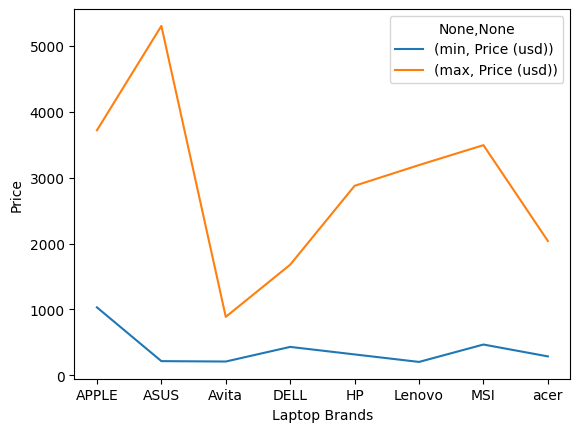

In [373]:
pivot.plot()
plt.xlabel("Laptop Brands")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

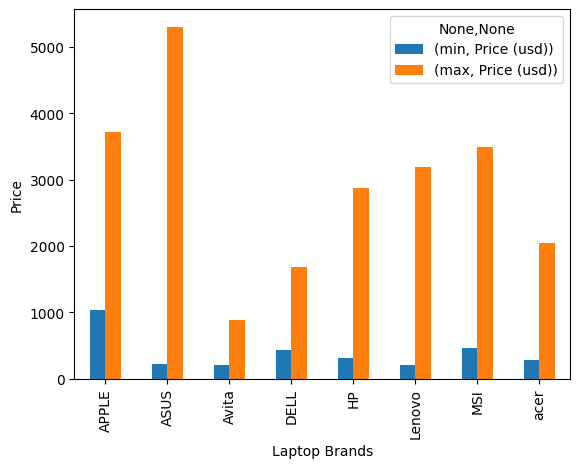

In [374]:
pivot.plot(kind="bar")
plt.xlabel("Laptop Brands")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

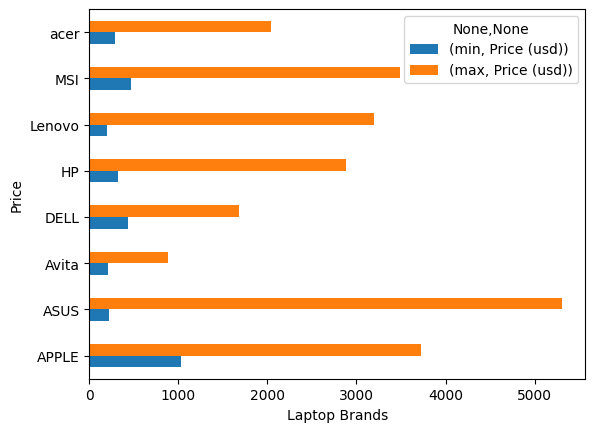

In [375]:
pivot.plot(kind="barh")
plt.xlabel("Laptop Brands")
plt.ylabel("Price")

## Recipe 3: How to merge datasets 

I looked more on Kaggle and I found a dataset that is pretty similar to the one we explored previously. Here is a link to the second dataset: https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list

Importing dataset...

In [376]:
df_2 = pd.read_csv("Cleaned_Laptop_data.csv")

Before we continue further, the latest_price column is in rupee. So we will convert to USD...

In [377]:
df_2["latest_price_2"] = df_2["latest_price"] * 0.012

Let's take a look at the dataframe...

In [378]:
df_2.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,latest_price_2
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,0,No,No,24990,32790,23,3.7,63,12,299.88
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,0,No,No,19590,21325,8,3.6,1894,256,235.08
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,0,No,No,19990,27990,28,3.7,1153,159,239.88
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,0,No,No,21490,27990,23,3.7,1153,159,257.88
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,0,No,No,24990,33490,25,3.7,1657,234,299.88


Columns of interest: brand, processor_brand, processor_name, processor_gnrtn, ram_gb, ram_type, os, Touchscreen, Price (usd)/latest_price_2

We will go ahead and cut our dataframe using the .iloc[] function noting that we want all rows and select the columns with the columns of interest as stated above ^^

In [379]:
df = df.iloc[:, [0,1,2,3,4,5,8,13,19]]
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,os,Touchscreen,Price (usd)
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,Windows,No,415.788
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,Windows,No,467.988
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,Windows,No,479.988
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,Windows,No,839.880
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,Windows,No,323.880
...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,Windows,No,1631.880
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,Windows,No,1739.880
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,Windows,No,1799.880
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,Windows,No,1715.880


In [380]:
df_2 = df_2.iloc[:, [0,2,3,4,5,6,9,15,23]]
df_2

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,os,Touchscreen,latest_price_2
0,Lenovo,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,Windows,No,299.88
1,Lenovo,AMD,APU Dual,10th,4 GB GB,DDR4,Windows,No,235.08
2,Avita,AMD,APU Dual,10th,4 GB GB,DDR4,Windows,No,239.88
3,Avita,AMD,APU Dual,10th,4 GB GB,DDR4,Windows,No,257.88
4,Avita,AMD,APU Dual,10th,4 GB GB,DDR4,Windows,No,299.88
...,...,...,...,...,...,...,...,...,...
891,ASUS,AMD,Ryzen 9,Missing,4 GB GB,DDR4,Windows,No,1739.88
892,ASUS,AMD,Ryzen 9,Missing,4 GB GB,DDR4,Windows,No,1799.88
893,ASUS,AMD,Ryzen 9,Missing,4 GB GB,DDR4,Windows,No,1715.88
894,SAMSUNG,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,Windows,No,467.88


One thing you might notice is that these dataframes are almost identical excpet for the last columns of each. I will change "latest_price_2" column name from df_2 to match the column name in df of "Price (usd)"...

One way to do this is by creating a new column name and set that column = to the latest_price column, then I can remove latest_price through .iloc[]. However, I will be using .rename() since it is a lot easier.

In [381]:
df_2 = df_2.rename(columns={"latest_price_2" : "Price (usd)"})
df_2

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,os,Touchscreen,Price (usd)
0,Lenovo,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,Windows,No,299.88
1,Lenovo,AMD,APU Dual,10th,4 GB GB,DDR4,Windows,No,235.08
2,Avita,AMD,APU Dual,10th,4 GB GB,DDR4,Windows,No,239.88
3,Avita,AMD,APU Dual,10th,4 GB GB,DDR4,Windows,No,257.88
4,Avita,AMD,APU Dual,10th,4 GB GB,DDR4,Windows,No,299.88
...,...,...,...,...,...,...,...,...,...
891,ASUS,AMD,Ryzen 9,Missing,4 GB GB,DDR4,Windows,No,1739.88
892,ASUS,AMD,Ryzen 9,Missing,4 GB GB,DDR4,Windows,No,1799.88
893,ASUS,AMD,Ryzen 9,Missing,4 GB GB,DDR4,Windows,No,1715.88
894,SAMSUNG,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,Windows,No,467.88


Finally, we will merge them using .concat()

In [382]:
merged_df = pd.concat([df, df_2], axis=0)
merged_df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,os,Touchscreen,Price (usd)
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,Windows,No,415.788
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,Windows,No,467.988
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,Windows,No,479.988
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,Windows,No,839.880
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,Windows,No,323.880
...,...,...,...,...,...,...,...,...,...
891,ASUS,AMD,Ryzen 9,Missing,4 GB GB,DDR4,Windows,No,1739.880
892,ASUS,AMD,Ryzen 9,Missing,4 GB GB,DDR4,Windows,No,1799.880
893,ASUS,AMD,Ryzen 9,Missing,4 GB GB,DDR4,Windows,No,1715.880
894,SAMSUNG,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,Windows,No,467.880


## Recipe 4: How to pull this information online not using a downloaded dataset

This dataset that we used was from Kaggle. It might be in our best interest to web scrape an actual website with real values. What if this Kaggle dataset is outdated? Because we have done a lot of work with HP laptops, I will go ahead and web scrape an HP website as follows...

In [383]:
from bs4 import BeautifulSoup
import requests

url = "https://www.hp.com/us-en/laptops-and-2-in-1s.html"
request = requests.get(url)
html = request.text
soup = BeautifulSoup(html)

I've taken a look at the source code/html of the webpage and there's a really good table of the HP laptops and its corresponding prices. I pulled this from the source code that is of interest...

In [384]:
"""
<hp-pricing class="js-hp-component c-pricing id563570b660088db830039eb3182355e6e0ee80b9696ac82fec6f06e137b298dc  " data-price-url="/content/experience-fragments/hp_com/global/en/laptops_and_2_in_1s/compare-laptops/compare-laptops/jcr:content/root/comparetable_1424812/bgContainer/bg-container-content-parsys/cardcarousel/grid/cells/cell_3/cellItems/grid/cells/cell_2/cellItems/pricing.price-dynamic.json?pids=%PIDS%">
    <style>
        .id563570b660088db830039eb3182355e6e0ee80b9696ac82fec6f06e137b298dc .c-pricing__label {
            color:  ;
        }
        .id563570b660088db830039eb3182355e6e0ee80b9696ac82fec6f06e137b298dc .c-pricing__currency-price {
            color: #000;
        }
    </style>

    <p class="c-pricing__container font-body align-center">
        <span class="c-pricing__label font-body">Starting at</span>
        <span class="c-pricing__currency-price h4">$839.99*</span>
        
    </p>
</hp-pricing>
"""

'\n<hp-pricing class="js-hp-component c-pricing id563570b660088db830039eb3182355e6e0ee80b9696ac82fec6f06e137b298dc  " data-price-url="/content/experience-fragments/hp_com/global/en/laptops_and_2_in_1s/compare-laptops/compare-laptops/jcr:content/root/comparetable_1424812/bgContainer/bg-container-content-parsys/cardcarousel/grid/cells/cell_3/cellItems/grid/cells/cell_2/cellItems/pricing.price-dynamic.json?pids=%PIDS%">\n    <style>\n        .id563570b660088db830039eb3182355e6e0ee80b9696ac82fec6f06e137b298dc .c-pricing__label {\n            color:  ;\n        }\n        .id563570b660088db830039eb3182355e6e0ee80b9696ac82fec6f06e137b298dc .c-pricing__currency-price {\n            color: #000;\n        }\n    </style>\n\n    <p class="c-pricing__container font-body align-center">\n        <span class="c-pricing__label font-body">Starting at</span>\n        <span class="c-pricing__currency-price h4">$839.99*</span>\n        \n    </p>\n</hp-pricing>\n'

Thus, we will have to look at all the hp-pricing's and then look into the second p tag...

In [385]:
# Find all the spans on the page
spans = soup.find_all("hp-pricing")
prices = []
for i in spans:
    # find paragraph tags...
    p_tags = i.find_all("p")
    # there are two span tags wrapped inside each p tag. We are only concerned with the second one...
    for p in p_tags:
        span_tag = p.find_all("span")
        #price = span_tag[1].text
        price = span_tag[1].text.strip('$*') # remove the dollar sign and asterisk
        prices.append(price)
prices

['269.99',
 '399.99',
 '649.99',
 '839.99',
 '999.00',
 '1,249.99',
 '1,099.99',
 '849.99*\u200b',
 '809.99']

I wasn't too sure how to do this but to convert all this into a float array, so I asked ChatGPT and here is what it told me to do...

In [386]:
cleaned_prices = []
for price in prices:
    cleaned_price = float(price.replace(',', '').replace('*', '').replace('\u200b', ''))
    cleaned_prices.append(cleaned_price)
cleaned_prices

[269.99, 399.99, 649.99, 839.99, 999.0, 1249.99, 1099.99, 849.99, 809.99]

This is a very small example of how to extract info via web scrape and then using html tags to get values of interest! A follow up project could be to compare the values I webscraped from the ones in Kaggle; however, the purpose of this isn't of interest for this cookbook. This can be considered a follow up project!